In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/ahcamachod/22ee402462306e4ee55032e833104929/raw/86234a227db3e0b3456d14be604841ba3fcf3203/hoteles.csv')

In [3]:
df.head()

,Estrellas,CercaniaTurismo,Capacidad,Precio
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


## Paso 1: Análisis con PairPlot

In [4]:
import seaborn as sns

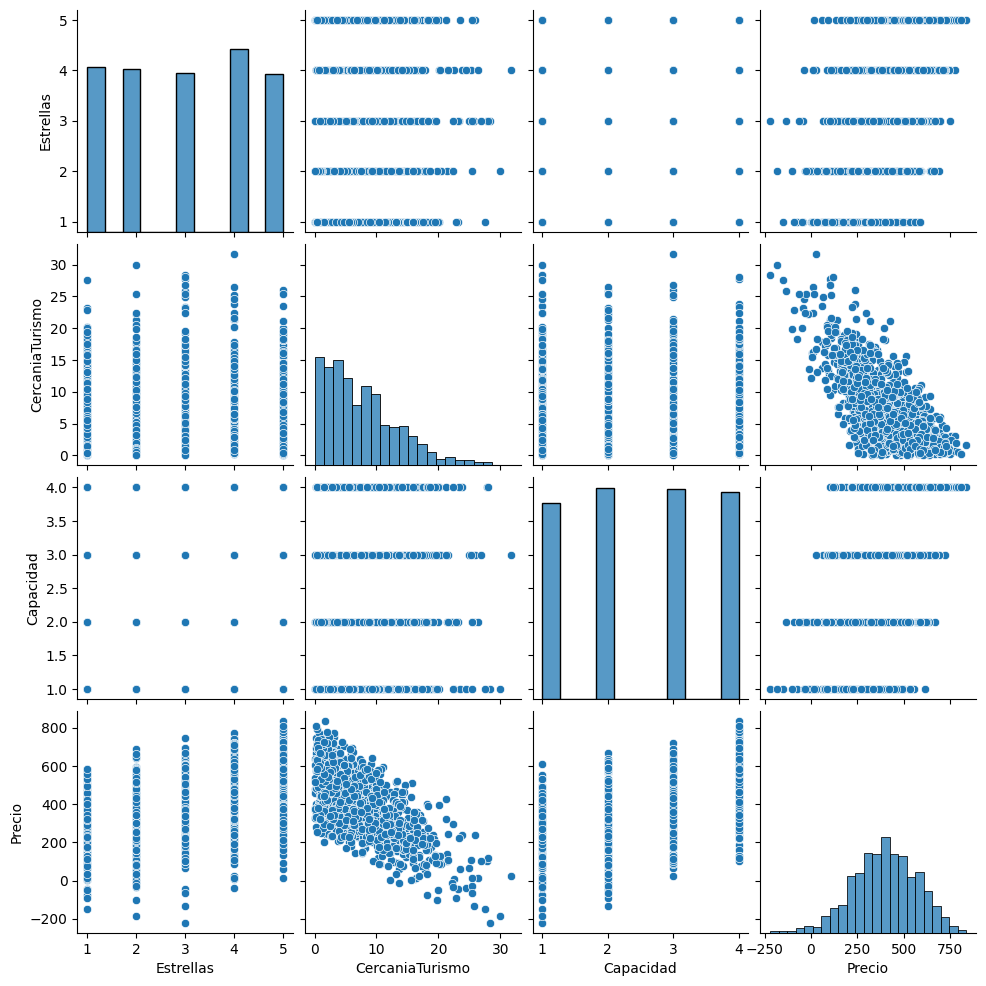

In [5]:
sns.pairplot(df)

## Paso 2: Construcción de modelos con regresión lineal

In [6]:
import statsmodels.api as sm

In [8]:
# Modelo 1: Utilizando únicamente 'Estrellas'
X1 = df[['Estrellas']]
X1 = sm.add_constant(X1)  # Adicionando a constante
y = df['Precio']
modelo_1 = sm.OLS(y, X1).fit()

# Modelo 2: Utilizando 'Estrellas' e 'CercaniaTurismo'
X2 = df[['Estrellas', 'CercaniaTurismo']]
X2 = sm.add_constant(X2)
modelo_2 = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrellas', 'CercaniaTurismo' e 'Capacidade'
X3 = df[['Estrellas', 'CercaniaTurismo', 'Capacidad']]
X3 = sm.add_constant(X3)
modelo_3 = sm.OLS(y, X3).fit()

## Paso 3: Comparación de modelos

In [9]:
print("Modelo 1 - Solo 'Estrellas':")
print(modelo_1.summary())
print("\nModelo 2 - 'Estrellas' e 'CercaniaTurismo':")
print(modelo_2.summary())
print("\nModelo 3 - 'Estrellas', 'CercaniaTurismo' e 'Capacidad':")
print(modelo_3.summary())

Modelo 1 - Solo 'Estrellas':
                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           6.09e-40
Time:                        11:28:17   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517  